# Alcohol Heat Map

## Dependencies Set-up

In [8]:
# Dependencies
from vis1_cnfg import gkey
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from us import states
import json
import matplotlib.pyplot as plt
#from scipy.stats import linregress
from scipy import stats

# Configure gmaps with API key
gmaps.configure(api_key=gkey)

## Data Retrieval

In [14]:
# Import the original data we analyzed earlier. Use dtype="object" to match other
df_alchy = pd.read_csv("../data/clean_data/alcohol_ana_avg.csv")
df_alchy.head()

,Country Code,Country,Average Alcohol,Average Beer,Average Wine,Average Spirits,Average Other
0,AF,Afghanistan,0.031667,0.010000,0.000000,0.023333,0.000000
1,AL,Albania,5.188571,1.731429,1.222857,2.137143,0.095714
2,DZ,Algeria,0.505714,0.255714,0.164286,0.081429,0.000000
3,AO,Angola,7.291429,4.562857,1.754286,0.920000,0.054286
4,AR,Argentina,8.193333,3.286667,3.680000,0.471667,0.760000


In [15]:
df_happiness_complete = pd.read_csv("../data/clean_data/vis1_happinesscomplete.csv")
df_happiness_complete.head()

,Country,Country Code,Latitude,Longitude,Happiness
0,Afghanistan,AF,33.939110,67.709953,3.897008
1,Albania,AL,41.153332,20.168331,5.018378
2,Algeria,DZ,28.033886,1.659626,5.616222
3,Angola,AO,-11.202692,17.873887,4.420299
4,Argentina,AR,-38.416097,-63.616672,6.580427


In [16]:
#merge happiness_complete (161 rows) with happiness_df (153 rows)

df_merged = pd.merge(
    df_happiness_complete, df_alchy, how="inner", on=["Country Code", "Country Code"])

#happiness_complete = [happiness_complete.iloc[:,0:5]]

df_merged #has 153 rows after fixing Namibia problem

df_merged.rename(columns={'Country_x': 'Country'}, inplace=True)
df_merged.rename(columns={'Average Alcohol': 'Alcohol'}, inplace=True)

del df_merged['Country_y']
df_merged.head()

,Country,Country Code,Latitude,Longitude,Happiness,Alcohol,Average Beer,Average Wine,Average Spirits,Average Other
0,Afghanistan,AF,33.939110,67.709953,3.897008,0.031667,0.010000,0.000000,0.023333,0.000000
1,Albania,AL,41.153332,20.168331,5.018378,5.188571,1.731429,1.222857,2.137143,0.095714
2,Algeria,DZ,28.033886,1.659626,5.616222,0.505714,0.255714,0.164286,0.081429,0.000000
3,Angola,AO,-11.202692,17.873887,4.420299,7.291429,4.562857,1.754286,0.920000,0.054286
4,Argentina,AR,-38.416097,-63.616672,6.580427,8.193333,3.286667,3.680000,0.471667,0.760000


In [19]:
happy_df = df_merged['Happiness']

# Grab beer
avg_beer_df = df_merged['Average Beer']
beer_slope, beer_int, beer_r, beer_p, beer_std_err = stats.linregress(avg_beer_df, happy_df)
beer_fit = beer_slope * avg_beer_df + beer_int

# Grab wnine
avg_wine_df = df_merged['Average Wine']
wine_slope, wine_int, wine_r, wine_p, wine_std_err = stats.linregress(avg_wine_df, happy_df)
wine_fit = wine_slope * avg_wine_df + wine_int

# Grab spirits
avg_spirits_df = df_merged['Average Spirits']
spirits_slope, spirits_int, spirits_r, spirits_p, spirits_std_err = stats.linregress(avg_spirits_df, happy_df)
spirits_fit = spirits_slope * avg_spirits_df + spirits_int

# Grab other
avg_other_df = df_merged['Average Other']
other_slope, other_int, other_r, other_p, other_std_err = stats.linregress(avg_other_df, happy_df)
other_fit = spirits_slope * avg_other_df + other_int

The correlation coefficient between beer consumption and happiness is : 0.4828774150611897
The standard error for the gradient is : 0.044033751813090403
The p-value for the null hypothesis of beer consumption influencing happiness is : 2.5927821535156755e-10
The correlation coefficient between wine consumption and happiness is : 0.47009342345011934
The standard error for the gradient is : 0.05090784261482363
The p-value for the null hypothesis of wine consumption influencing happiness is : 8.74270220201766e-10
The correlation coefficient between spirits consumption and happiness is : 0.2626257238067703
The standard error for the gradient is : 0.05839272071706178
The p-value for the null hypothesis of spirits consumption influencing happiness is : 0.0010394527513616868
The correlation coefficient between other consumption and happiness is : -0.2156153340657598
The standard error for the gradient is : 0.06261401161439721
The p-value for the null hypothesis of other consumption influencin

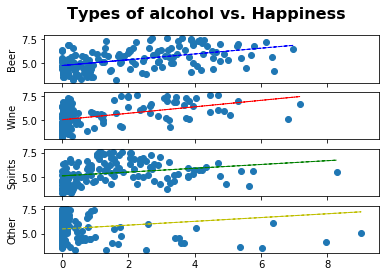

<Figure size 720x432 with 0 Axes>

In [25]:
# Plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig.suptitle("Types of alcohol vs. Happiness", fontsize=16, fontweight="bold")

#ax1.set_xlim(min(year), max(year))
ax1.scatter(avg_beer_df, happy_df, linewidth=1, marker="o")
ax1.plot(avg_beer_df, beer_fit, "b--", linewidth=1)
ax1.set_ylabel("Beer")

ax2.scatter(avg_wine_df, happy_df, linewidth=1, marker="o")
ax2.plot(avg_wine_df, wine_fit, "r--", linewidth=1)
ax2.set_ylabel("Wine")

ax3.scatter(avg_spirits_df, happy_df, linewidth=1, marker="o")
ax3.plot(avg_spirits_df, spirits_fit, "g--", linewidth=1)
ax3.set_ylabel("Spirits")

ax4.scatter(avg_other_df, happy_df, linewidth=1, marker="o")
ax4.plot(avg_other_df, other_fit, "y--", linewidth=1)
ax4.set_ylabel("Other")

plt.figure(figsize=(10,6))
#plt.scatter(df_merged["Latitude"], df_merged["Alcohol"], color='m', alpha=0.9)
#plt.plot(df_merged["Latitude"], lat_fit, "b--", linewidth=1)
#plt.grid()
#plt.xlabel('Latitude')
#plt.ylabel('Annual Liter per Capita of All Alcoholic Beverages')
#plt.title(f'Country Latitude vs Alcohol Consumption')
#plt.savefig("./output/alcoholtypes.png")

#plt.show()
print(f"The correlation coefficient between beer consumption and happiness is : {beer_r}")
print(f"The standard error for the gradient is : {beer_std_err}")
print(f"The p-value for the null hypothesis of beer consumption influencing happiness is : {beer_p}")

print(f"The correlation coefficient between wine consumption and happiness is : {wine_r}")
print(f"The standard error for the gradient is : {wine_std_err}")
print(f"The p-value for the null hypothesis of wine consumption influencing happiness is : {wine_p}")

print(f"The correlation coefficient between spirits consumption and happiness is : {spirits_r}")
print(f"The standard error for the gradient is : {spirits_std_err}")
print(f"The p-value for the null hypothesis of spirits consumption influencing happiness is : {spirits_p}")

print(f"The correlation coefficient between other consumption and happiness is : {other_r}")
print(f"The standard error for the gradient is : {other_std_err}")
print(f"The p-value for the null hypothesis of other consumption influencing happiness is : {other_p}")

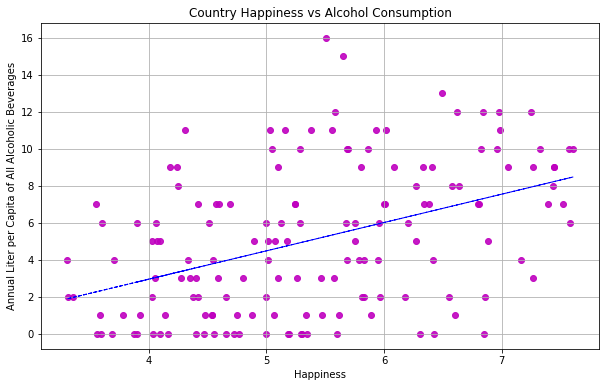

The correlation coefficient between happiness and alcohol consumption is : 0.33413631849641207
The standard error for the gradient is : 0.01227286679339339
The p-value for the null hypothesis of happiness influencing alcohol consumption is : 2.4309805817955274e-05


In [41]:
# Plotting the Data - Latitude vs. Alcohol Plot
alc_slope, alc_int, alc_r, alc_p, alc_std_err = stats.linregress(
    df_merged["Happiness"], df_merged["Alcohol"])
alc_fit = alc_slope * df_merged["Happiness"] + alc_int

plt.figure(figsize=(10,6))
plt.scatter(df_merged["Happiness"], df_merged["Alcohol"], color='m', alpha=0.9)
plt.plot(df_merged["Happiness"], alc_fit, "b--", linewidth=1)
plt.grid()
plt.xlabel('Happiness')
plt.ylabel('Annual Liter per Capita of All Alcoholic Beverages')
plt.title(f'Country Happiness vs Alcohol Consumption')
plt.savefig("./output/happyvalchy.png")
plt.show()
print(f"The correlation coefficient between happiness and alcohol consumption is : {lat_r}")
print(f"The standard error for the gradient is : {lat_std_err}")
print(f"The p-value for the null hypothesis of happiness influencing alcohol consumption is : {lat_p}")